In [6]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pywt

%matplotlib inline

# Introduction

## Data on the Sequence Read Archive  (SRA)

Datasets on the Sequence Read Archive (SRA) database are growing exponentially, providing a great wealth of data and information. This makes the SRAdb a great resource for meta analysis studies, however the meta data associated with the SRA inputs are poorly maintained making it hard to effectively account for batch effect.  


![sradb_summary](./figures/sra_bases_plot.png)


Examples of batch effects included:

    1. The lab that generated the experiment
    2. The technical variability (sequencer, reagents)
    3. Protocol (RNA-seq ribo-depleted, RNA-seq polyA, PRO-seq ligation, PRO-seq random priming etc. )
    
    
**<center>We propose using discrete wavelet transforms (DWT) to automate the meta-data flagging procedure.</center>**  

## Wavelets and some applications

Wavelets have proved to be a useful tool as a compression tool and de-noising algorithm in various applications. Lee et al. 2019 provide a python API for discrete and continuous wavelet transforms <cite data-cite="6929275/SX69KVH6"></cite>. 



## Wavelets and functions

Mathematically, a wavelet transform is represented as shown below: 

$$X_{g(a,b)} =  \frac{1}{|a|^{1/2}} \int_{-\infty}^{\infty} g (t) \psi \frac{t-b}{a} dt$$

$\psi(t)$ : mother wavelet

$a$ : scaling factor

$b$ : translation factor

DWT uses discrete values for the scale ($a$) and translation factor ($b$)

- the scale factor increases in powers of two ($a = 1,2,4 ...$)
- the translation factor increases integer values ($b = 1,2,3 ..$)

The DWT is only discrete in the scale and translation domain, and not in the time domain, while the CWT is continuous in the scale and translation domain.

## Examples of wavelets


Below are examples of some the wavelets available in the pywavelet module <cite data-cite="6929275/JYI9DVIC"></cite><cite data-cite="6929275/SX69KVH6"></cite>. 

In [13]:
discrete_wavelets = ['sym5','db5', 'coif4', 'rbio3.9'] 
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

In [4]:
def sample_wavelets(discrete, continuous):
    list_of_list_wavelets = [discrete, continuous]
    list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
    
    ##select list of lists with discrete and continuous wavelets
    for ii, list_wavelets in enumerate(list_of_list_wavelets):
        func = list_funcs[ii]
        row_no = ii
        for col_no, waveletname in enumerate(list_wavelets):
            
            #extract characteristics of the wavelets
            wavelet = func(waveletname)
            orthogonal = wavelet.orthogonal
            biorthogonal = wavelet.biorthogonal
            family_name = wavelet.family_name
            symmetry = wavelet.symmetry
            if ii == 0:
                _ = wavelet.wavefun()
                wavelet_function = _[0]
                x_values = _[-1]
            else:
                wavelet_function, x_values = wavelet.wavefun()
            if col_no == 0 and ii == 0:
                ax[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
            if col_no == 0 and ii == 1:
                ax[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
            ax[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
            ax[row_no, col_no].plot(x_values, wavelet_function)
            ax[row_no, col_no].set_yticks([])
            ax[row_no, col_no].set_yticklabels([])

    plt.tight_layout()
    plt.show()

0
1


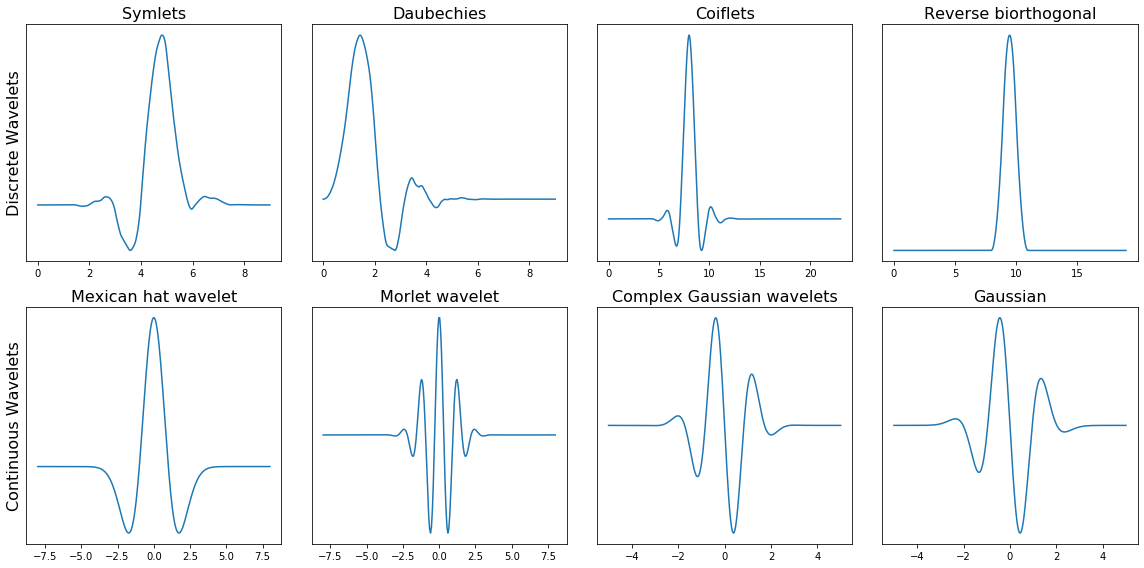

In [14]:
sample_wavelets(discrete_wavelets, continuous_wavelets)

# Applying wavelet transformation to genomic data

## Genomic signature used


The readout from most genome protocols are reads that correspond to fragments of the genome or trascriptome; as readout we are using read counts over genomic coordinates in the form of bedgraphs (unnormalized bedgraphs).

Bedgraphs give a counts of reads per genomic locus.


## Normalization 

In order to normalize the coverage across samples, the coverage maximum was set to 1.


$$c_i = \frac{x_i - min(x)}{max(x) - min(x)}$$

where $x = (x_i, ..., x_n)$ represents coverage as read counts by genomic location, and $c_i$ is is the normalized coverage per genomic location.

## DWT with *sym5*

The wavelet transform is applied to the normalized bedgraph region, with the default wevelet being *sym5*



# Bibliography

<div class="cite2c-biblio"></div>